In [98]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/kartikmehta/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [99]:
# read files

import numpy as np

def read_idx1_labels(filename):
    with open(filename, 'rb') as f:
        magic = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')
        label_data = np.frombuffer(f.read(), dtype=np.uint8)
    return label_data

def read_idx3(filename):
    with open(filename, 'rb') as f:
        magic = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape(num_images, rows, cols)
    return images

train_x = read_idx3('../data/mnist/train-images.idx3-ubyte')
train_y = read_idx1_labels('../data/mnist/train-labels.idx1-ubyte')

print(f"Train X Shape: {train_x.shape}")
print(f"Train Y Shape: {train_y.shape}")

Train X Shape: (60000, 28, 28)
Train Y Shape: (60000,)


In [100]:
train_x = torch.tensor(train_x).float()
train_y = torch.tensor(train_y).float()

In [101]:
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.l3(F.relu(self.l2(self.l1(x)))))
        x = self.l4(x)
        
        return x

In [102]:
import random as rand

epochs = 1000
batch_size = 64
loss = nn.CrossEntropyLoss()
model = MyNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_x = train_x.view(train_x.shape[0], -1)

for epoch in range(epochs):

    start_ix = rand.randint(0, train_x.shape[0]-batch_size)
    inp = train_x[start_ix:start_ix+batch_size]
    out = model(inp)
    
    epoch_loss = loss(out, train_y[start_ix:start_ix+batch_size].long())

    optimizer.zero_grad()
    epoch_loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch+1} \nLoss: {epoch_loss.item()} \n-------------------------")

Epoch: 1 
Loss: 4.461180210113525 
-------------------------
Epoch: 2 
Loss: 12.38381576538086 
-------------------------
Epoch: 3 
Loss: 3.578199625015259 
-------------------------
Epoch: 4 
Loss: 3.049586772918701 
-------------------------
Epoch: 5 
Loss: 3.4430956840515137 
-------------------------
Epoch: 6 
Loss: 1.822474718093872 
-------------------------
Epoch: 7 
Loss: 1.7309720516204834 
-------------------------
Epoch: 8 
Loss: 1.68312668800354 
-------------------------
Epoch: 9 
Loss: 1.511344313621521 
-------------------------
Epoch: 10 
Loss: 1.2246294021606445 
-------------------------
Epoch: 11 
Loss: 1.8543508052825928 
-------------------------
Epoch: 12 
Loss: 1.2669687271118164 
-------------------------
Epoch: 13 
Loss: 1.4641954898834229 
-------------------------
Epoch: 14 
Loss: 1.5253405570983887 
-------------------------
Epoch: 15 
Loss: 1.0024253129959106 
-------------------------
Epoch: 16 
Loss: 0.7580649256706238 
-------------------------
Epoch: 17

In [114]:
train_y[2]

tensor(4.)

In [115]:
torch.argmax(model(train_x[2].unsqueeze(0))).item()

4

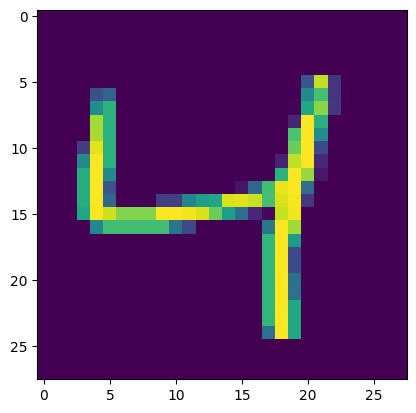

In [117]:
import matplotlib.pyplot as plt

img = train_x[2].view(1, 28, 28).permute(1, 2, 0)  # Change channels last
plt.imshow(img.cpu().numpy())
plt.show()

In [106]:
# Test set accuracy 

x_test = read_idx3("../data/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte")
y_test = read_idx1_labels("../data/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte")

In [107]:
res = []

x_in = torch.tensor(x_test).float()
y_in = torch.tensor(y_test).float()

for i in range(x_test.shape[0]):
    out = model(x_in[i].view(1, -1))
    res.append(int(torch.argmax(out).item() == y_test[i]))

accuracy = (sum(res) / len(res)) * 100

print(f"{accuracy}%")

94.8%


# 94.8% Accuracy 